## Sample Network 1 (Estuaries) code


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import collections

import networkx as nx
import networkx.algorithms.community as nx_comm

In [2]:
A=np.array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], 
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], 
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], 
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print(A)

[[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 

In [3]:
# Compute the determinant of the adjacency matrix
det = np.linalg.det(A)

# Print the determinant
print(f'The determinant of the adjacency matrix is {det}.')

# Compute the trace of the adjacency matrix
trace = np.trace(A)

# Print the trace
print(f'The trace of the adjacency matrix is {trace}.')

The determinant of the adjacency matrix is 0.0.
The trace of the adjacency matrix is 0.


In [4]:
G = nx.Graph(A, nodetype=int)
G.edges()

EdgeView([(0, 4), (0, 5), (0, 26), (1, 26), (2, 6), (2, 7), (2, 26), (2, 27), (3, 8), (3, 9), (3, 10), (3, 11), (3, 15), (3, 16), (3, 17), (3, 22), (3, 26), (3, 27), (4, 12), (4, 13), (4, 14), (4, 24), (4, 26), (5, 12), (5, 13), (5, 14), (5, 26), (6, 25), (6, 26), (7, 15), (7, 24), (7, 26), (8, 20), (8, 24), (8, 26), (9, 24), (9, 26), (10, 18), (10, 19), (10, 20), (10, 21), (10, 24), (10, 26), (11, 16), (11, 17), (11, 22), (11, 26), (12, 19), (12, 25), (12, 26), (13, 19), (13, 23), (13, 25), (13, 26), (14, 23), (14, 25), (14, 26), (15, 19), (15, 20), (15, 23), (15, 24), (15, 26), (16, 18), (16, 19), (16, 20), (16, 21), (16, 23), (16, 24), (16, 26), (17, 18), (17, 19), (17, 20), (17, 21), (17, 24), (17, 26), (18, 20), (18, 24), (18, 25), (18, 26), (19, 24), (19, 25), (19, 26), (20, 24), (20, 25), (20, 26), (21, 24), (21, 25), (21, 26), (22, 23), (22, 24), (22, 26)])

In [5]:
G = nx.Graph(A, nodetype=int)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27))

In [6]:
print(nx.info(G))

Graph with 28 nodes and 91 edges


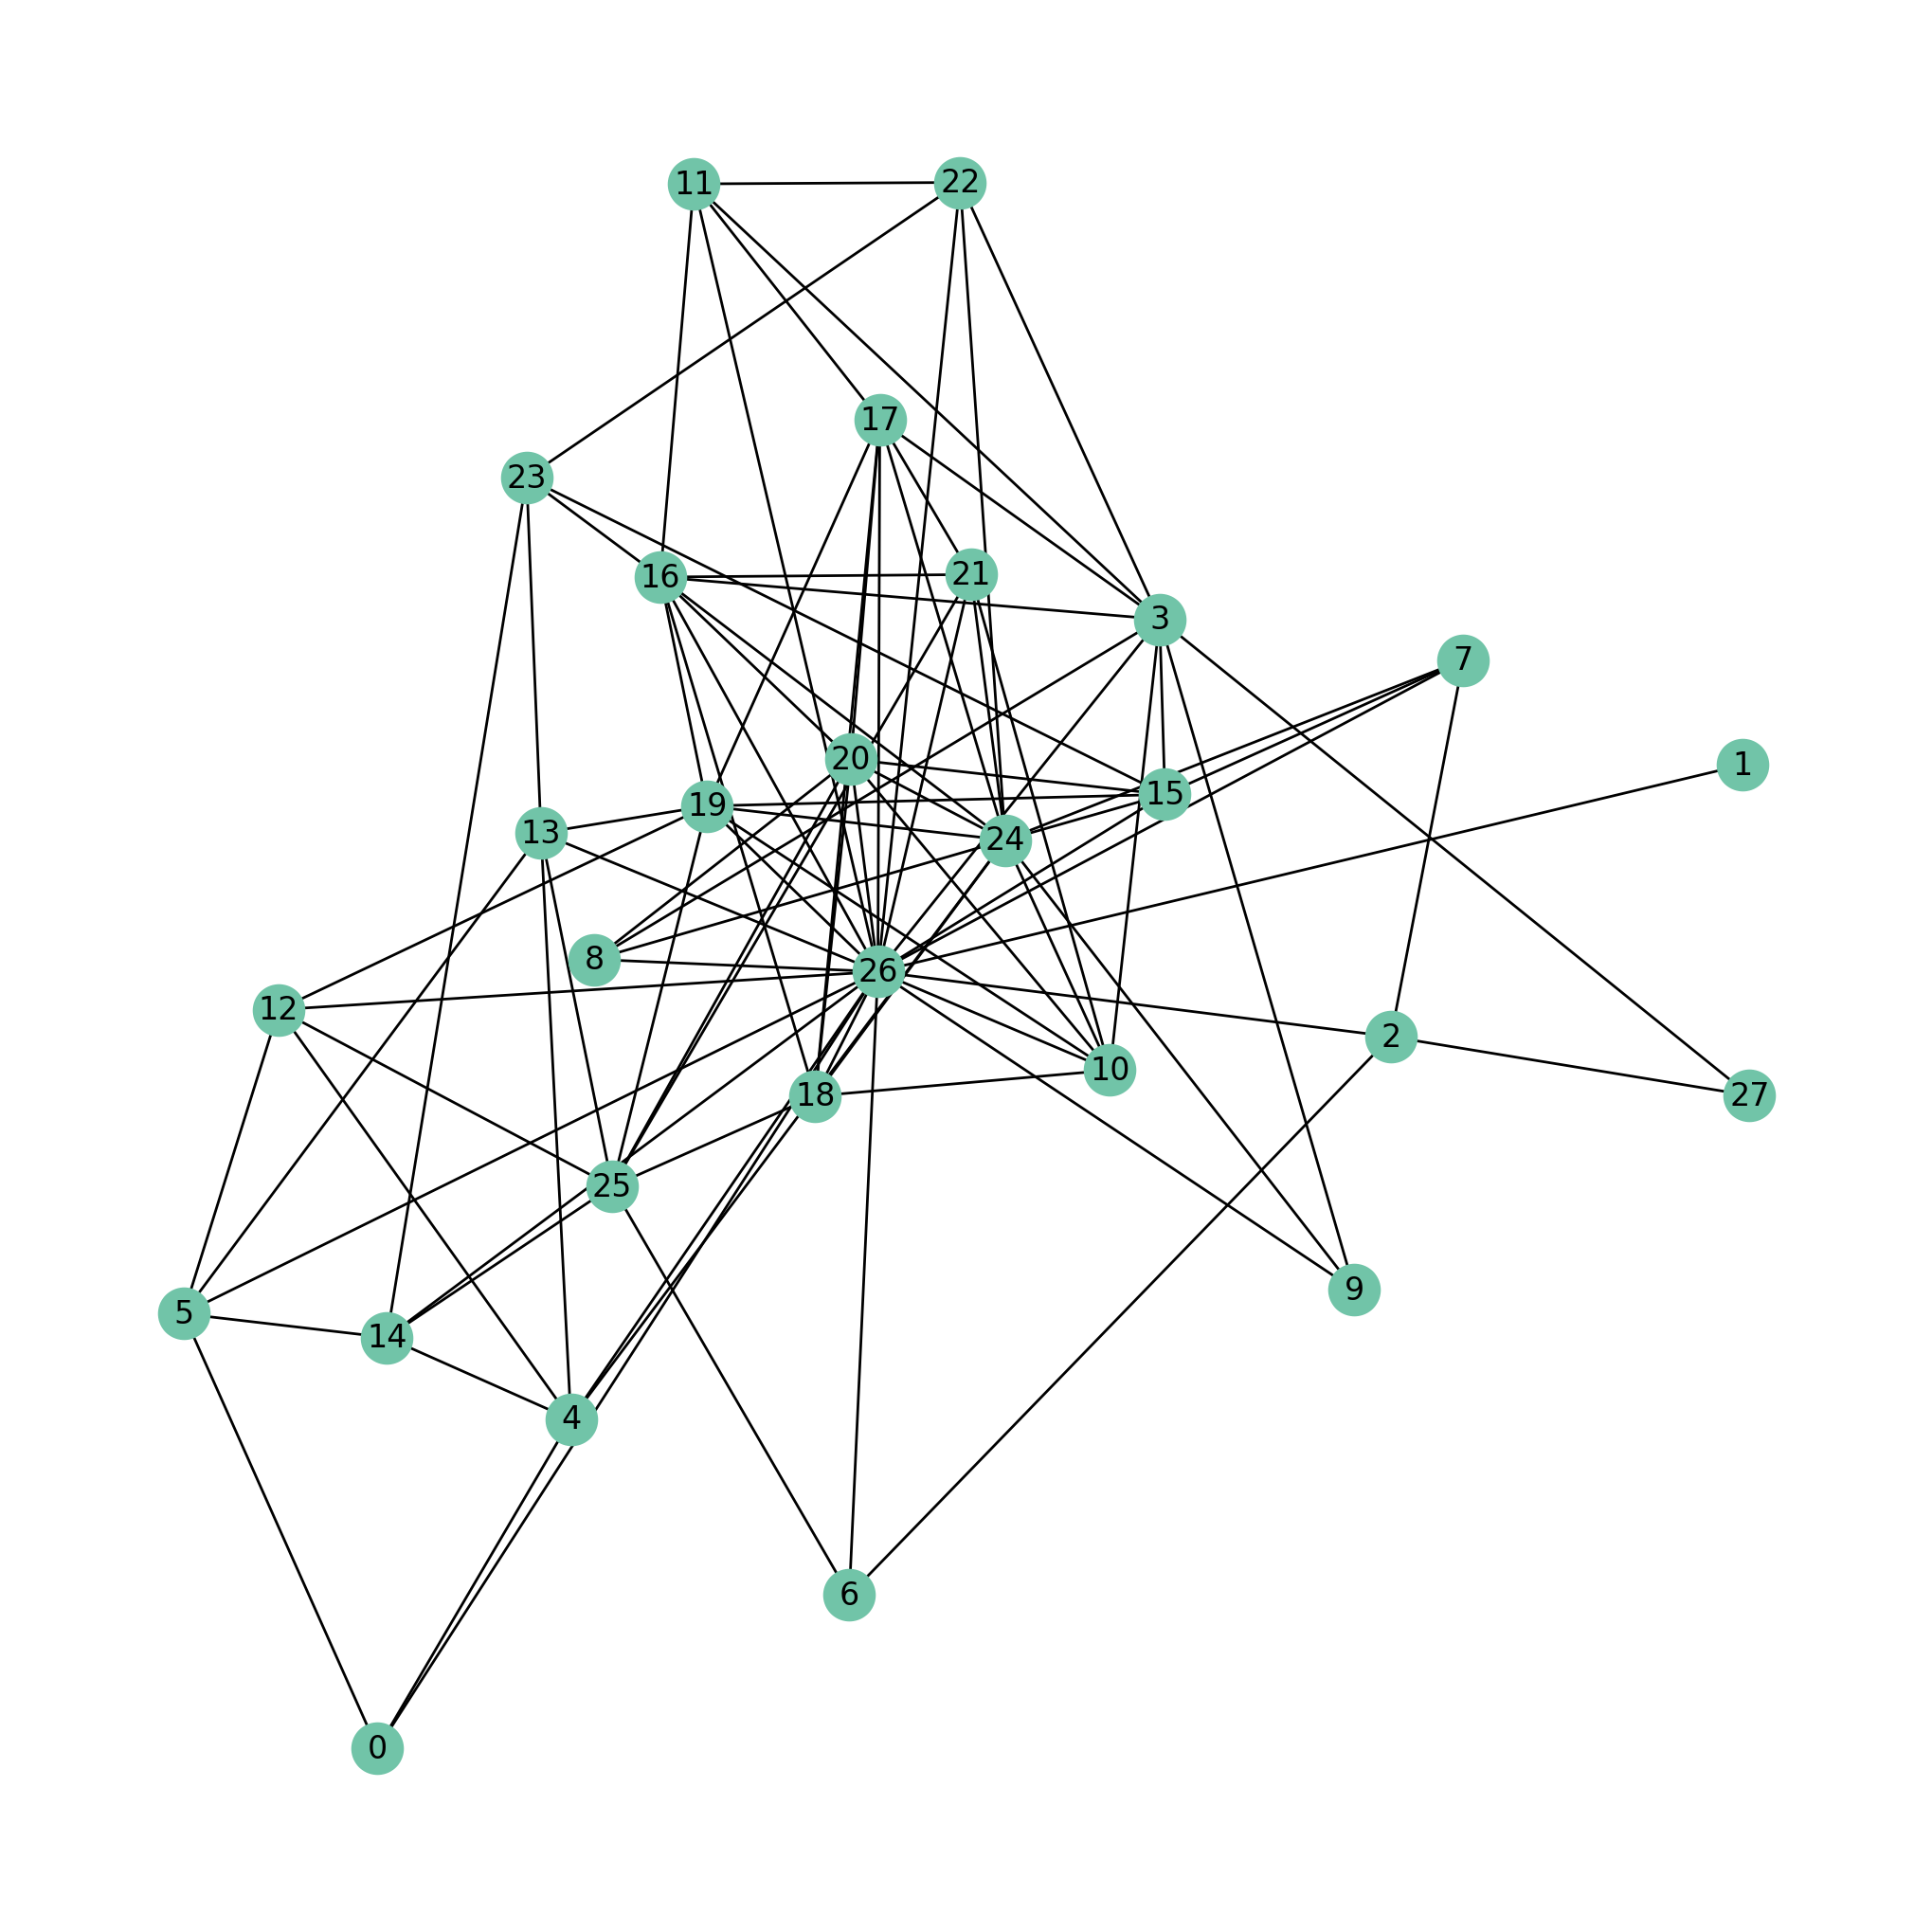

In [7]:
fig = plt.figure(figsize=(10, 10), dpi=200)

# Compute the positions of the nodes
pos = nx.spring_layout(G, k=1)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=100, linewidths=10, node_color="#71C4A8")

# Remove axis and adjust margins
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Save the plot to a file
plt.savefig("estuaries_graph.png", dpi=300)
plt.show()

In [8]:
dict(G.degree())

{0: 3,
 1: 1,
 2: 4,
 3: 10,
 4: 6,
 5: 5,
 6: 3,
 7: 4,
 8: 4,
 9: 3,
 10: 7,
 11: 5,
 12: 5,
 13: 6,
 14: 5,
 15: 7,
 16: 9,
 17: 8,
 18: 7,
 19: 9,
 20: 9,
 21: 6,
 22: 5,
 23: 5,
 24: 13,
 25: 8,
 26: 23,
 27: 2}

In [9]:
dict(nx.betweenness_centrality(G))

{0: 0.0007197480881691408,
 1: 0.0,
 2: 0.024093293537737984,
 3: 0.07216435036947859,
 4: 0.01624479966810151,
 5: 0.006351467462578573,
 6: 0.007736473135023859,
 7: 0.006009274958892593,
 8: 0.0025153632524205,
 9: 0.001509659348165871,
 10: 0.008802044901420988,
 11: 0.0019230769230769234,
 12: 0.006686483488542986,
 13: 0.01758837045880602,
 14: 0.014322608713512115,
 15: 0.022243829041830178,
 16: 0.033254468071792886,
 17: 0.014262633695343115,
 18: 0.00843178758671923,
 19: 0.02716152617407287,
 20: 0.0202447740002259,
 21: 0.00843178758671923,
 22: 0.01175342001927697,
 23: 0.010331026997693666,
 24: 0.06963755617601772,
 25: 0.030228824673269112,
 26: 0.46760776192752174,
 27: 0.0014245014245014246}

In [10]:
dict(nx.closeness_centrality(G))

{0: 0.5,
 1: 0.47368421052631576,
 2: 0.5294117647058824,
 3: 0.6,
 4: 0.5510204081632653,
 5: 0.5294117647058824,
 6: 0.5094339622641509,
 7: 0.5294117647058824,
 8: 0.5294117647058824,
 9: 0.5094339622641509,
 10: 0.5625,
 11: 0.54,
 12: 0.5294117647058824,
 13: 0.5510204081632653,
 14: 0.54,
 15: 0.574468085106383,
 16: 0.6,
 17: 0.574468085106383,
 18: 0.5625,
 19: 0.5869565217391305,
 20: 0.5869565217391305,
 21: 0.5510204081632653,
 22: 0.54,
 23: 0.4576271186440678,
 24: 0.6,
 25: 0.5,
 26: 0.8709677419354839,
 27: 0.4090909090909091}

In [11]:
dict(nx.eigenvector_centrality(G))

{0: 0.08140340522856922,
 1: 0.05180775875349383,
 2: 0.08004906598124856,
 3: 0.2319104724697351,
 4: 0.14248491215498332,
 5: 0.10717782955502457,
 6: 0.08081877719308536,
 7: 0.1204432704423925,
 8: 0.1453749837825166,
 9: 0.11460530537886139,
 10: 0.22398973667970926,
 11: 0.15538870528091517,
 12: 0.13035343919520748,
 13: 0.14238086684284804,
 14: 0.1129527521718291,
 15: 0.20110789640764726,
 16: 0.2544368573462811,
 17: 0.24240942969864052,
 18: 0.2228540514828855,
 19: 0.24825425179987154,
 20: 0.25957342620814544,
 21: 0.19208437307923032,
 22: 0.14505242604543325,
 23: 0.10146260324158465,
 24: 0.2978517350863632,
 25: 0.16468510719568769,
 26: 0.4370480077272927,
 27: 0.0369795631693815}

In [12]:
dict(nx.katz_centrality(G))

{0: 0.1031058067191804,
 1: 0.07461309282459745,
 2: 0.10484795527130847,
 3: 0.2290434209978102,
 4: 0.15659030033591256,
 5: 0.12833688657461226,
 6: 0.10264309396059289,
 7: 0.1333264325716196,
 8: 0.15032912819902547,
 9: 0.1257708442301724,
 10: 0.21455541277915768,
 11: 0.1602447152255361,
 12: 0.1445816555811639,
 13: 0.15674060332581757,
 14: 0.13280996161060118,
 15: 0.19975135860208745,
 16: 0.24273882906100955,
 17: 0.23057988131635587,
 18: 0.21375739616833414,
 19: 0.2393064648469422,
 20: 0.2455828895582265,
 21: 0.18919911219948107,
 22: 0.1539542605120243,
 23: 0.12158949693949603,
 24: 0.2825341948367787,
 25: 0.17545210310690187,
 26: 0.4162308914863887,
 27: 0.06637914370604446}

In [13]:
dict(nx.subgraph_centrality(G))

{0: 34.353804276419915,
 1: 13.756571016021201,
 2: 33.195027515408,
 3: 253.04617253654953,
 4: 98.9419752670042,
 5: 59.62300799813009,
 6: 32.91292263572429,
 7: 69.52796952326851,
 8: 99.43291773201835,
 9: 62.38819766492517,
 10: 233.63562177065324,
 11: 114.81910479496725,
 12: 83.45049705633801,
 13: 99.22557858869989,
 14: 64.11595743041565,
 15: 188.87738882274138,
 16: 300.7455269335207,
 17: 273.4130269435942,
 18: 231.82862685396447,
 19: 286.45292155000294,
 20: 313.629786207717,
 21: 172.2212469665512,
 22: 100.05326583925685,
 23: 50.89102869211156,
 24: 412.67137956889934,
 25: 130.33285538224445,
 26: 883.2986760657136,
 27: 8.617425719950571}

In [14]:
print(nx.average_shortest_path_length(G))

1.8465608465608465


In [15]:
print(nx.average_clustering(G))

0.33029548953462


In [16]:
print(nx.transitivity(G))

0.26902173913043476


In [17]:
print(nx.degree_assortativity_coefficient(G))

-0.28778563971697


In [18]:
dict(nx.clustering(G))

{0: 0.6666666666666666,
 1: 0,
 2: 0.3333333333333333,
 3: 0.24444444444444444,
 4: 0.26666666666666666,
 5: 0.4,
 6: 0.3333333333333333,
 7: 0.5,
 8: 0.5,
 9: 0.3333333333333333,
 10: 0.47619047619047616,
 11: 0.7,
 12: 0.4,
 13: 0.26666666666666666,
 14: 0.2,
 15: 0.3333333333333333,
 16: 0.3333333333333333,
 17: 0.42857142857142855,
 18: 0.5714285714285714,
 19: 0.3333333333333333,
 20: 0.4444444444444444,
 21: 0.4,
 22: 0.3,
 23: 0,
 24: 0.21794871794871795,
 25: 0.10714285714285714,
 26: 0.15810276679841898,
 27: 0}

In [19]:
dict(nx.eccentricity(G))

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 3,
 14: 3,
 15: 2,
 16: 2,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 3,
 22: 3,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3}

In [20]:
print(nx.radius(G))

2


In [21]:
print(nx.diameter(G))

3


In [22]:
dict(nx.triangles(G))

{0: 2,
 1: 0,
 2: 2,
 3: 11,
 4: 4,
 5: 4,
 6: 1,
 7: 3,
 8: 3,
 9: 1,
 10: 10,
 11: 7,
 12: 4,
 13: 4,
 14: 2,
 15: 7,
 16: 12,
 17: 12,
 18: 12,
 19: 12,
 20: 16,
 21: 6,
 22: 3,
 23: 0,
 24: 17,
 25: 3,
 26: 40,
 27: 0}

In [23]:
def edge_to_remove(graph):
 G_dict = nx.edge_betweenness_centrality(graph)
 edge = ()

 # extract the edge with highest edge betweenness centrality score
 for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
     edge = key
     break

 return edge

In [24]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [25]:

# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))
node_groups


[[0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [1]]

In [26]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('#71C4A8')
    else: 
        color_map.append('#E35060')  

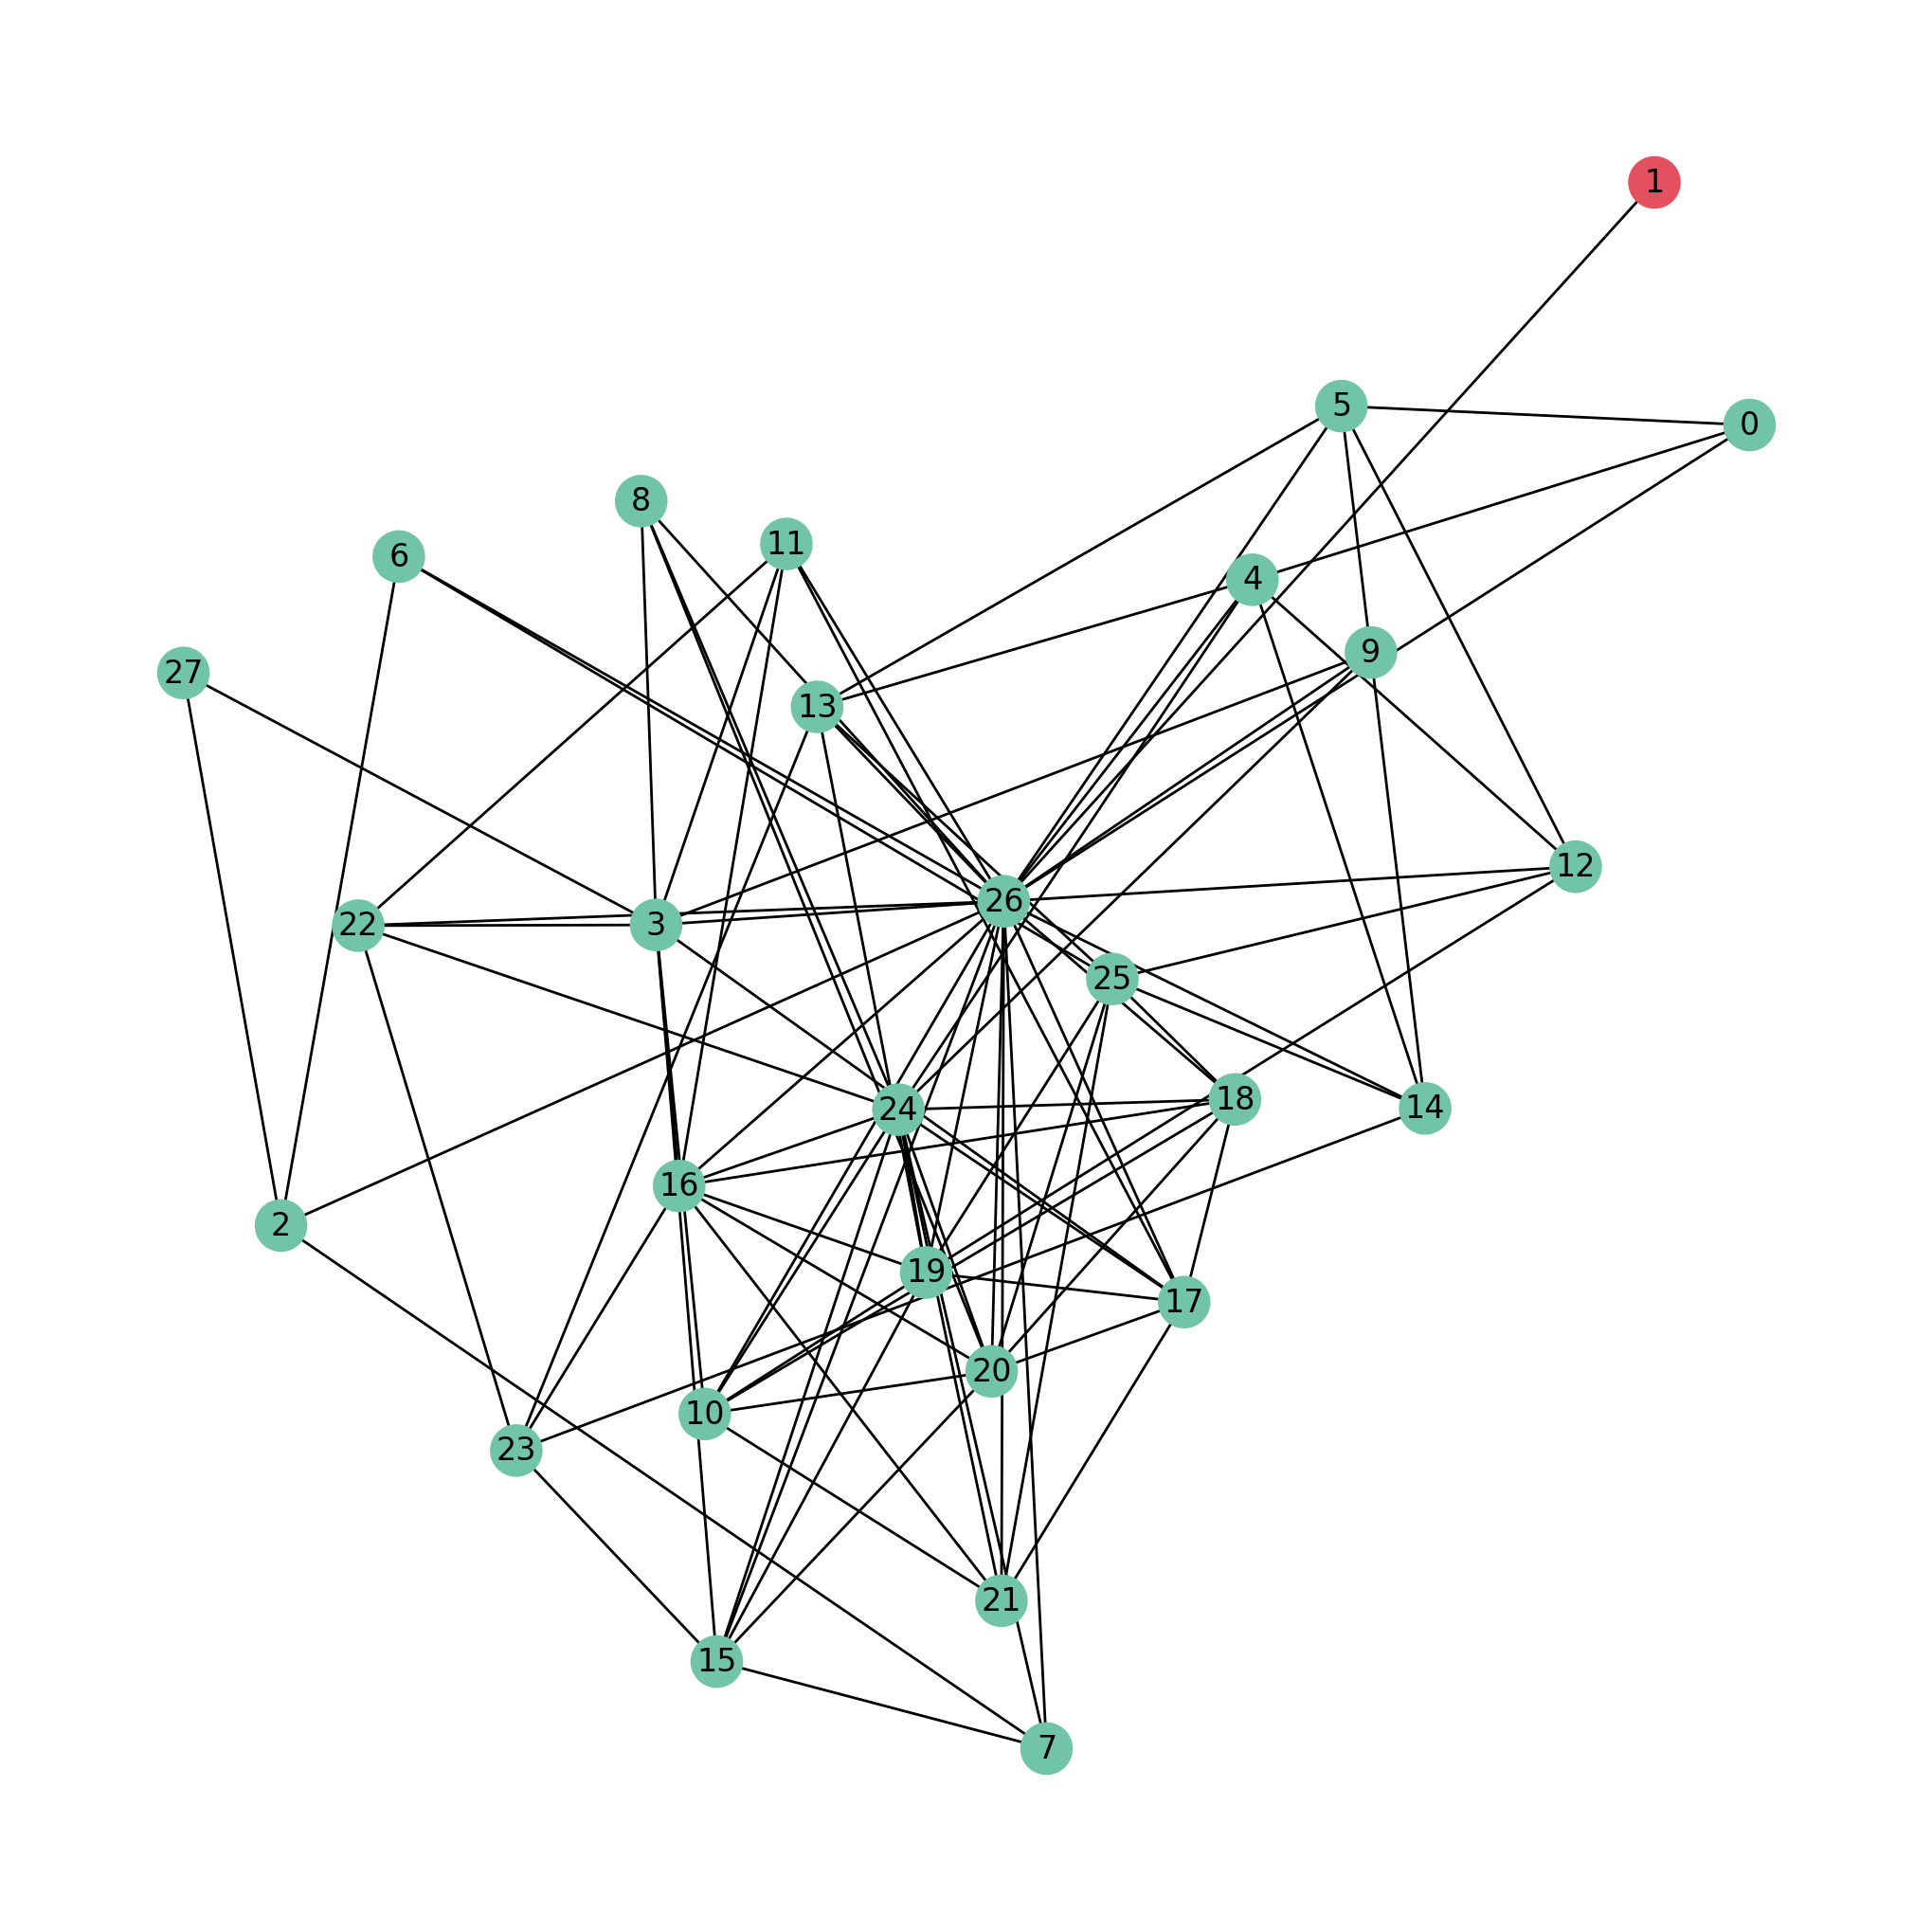

In [27]:
fig = plt.figure(figsize=(10, 10), dpi=200)

# Compute the positions of the nodes
pos = nx.spring_layout(G, k=1)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=100, linewidths=10, node_color=color_map)

# Remove axis and adjust margins
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Save the plot to a file
plt.savefig("estuaries_communities_graph.png", dpi=300)
plt.show()

In [28]:
print(nx_comm.modularity(G, [{0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27},{1}]))

-6.037918125821053e-05


In [29]:
# Find the eigenvalues and eigenvectors of the adjacency matrix
eigenvalues, eigenvectors = np.linalg.eig(A)

# Save the eigenvalues and eigenvectors to CSV files
pd.DataFrame(eigenvalues.real, columns=['eigenvalue']).to_csv('eigenvalues.csv', index=False, float_format='%.6f')
pd.DataFrame(eigenvectors.real, columns=[f'eigenvector_{i+1}' for i in range(len(eigenvectors))]).to_csv('eigenvectors.csv', index=False, float_format='%.6f')

In [30]:
distance_matrix = np.where(A==1, 1, np.inf)

for k in range(distance_matrix.shape[0]):
    np.minimum(distance_matrix, distance_matrix[k,:] + distance_matrix[:,k].reshape(-1,1), out=distance_matrix)

np.savetxt('distance_matrix.csv', distance_matrix, delimiter=',', fmt='%d')

In [31]:
# Calculate the incidence of the edges on the nodes
inc_mtx = nx.incidence_matrix(G)
print(inc_mtx.todense())

pd.DataFrame(inc_mtx.todense()).to_csv('incidence_matrix.csv') #incidence matrix

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

# Convert the adjacency matrix to a CSR sparse matrix
sparse_matrix = csr_matrix(A)

# Find the connected components in the network
num_partitions, partitions = connected_components(sparse_matrix)

# Print the number of partitions
print(f'The network has {num_partitions} partition(s).')

The network has 1 partition(s).


In [33]:
# Find the number of cliques, spectral radius, and eigenvalue spacing for the adjacency matrix and save them to a CSV file
cliques = list(nx.find_cliques(G))
spectral_radius = max(abs(np.linalg.eigvals(A)))
eigenvalues = sorted(abs(np.linalg.eigvals(A)))
eigenvalue_spacing = min([eigenvalues[i+1]-eigenvalues[i] for i in range(len(eigenvalues)-1)])
pd.DataFrame({'num_cliques': [len(cliques)], 'spectral_radius': [spectral_radius], 'eigenvalue_spacing': [eigenvalue_spacing]}).to_csv('clique_spectral_eigenvalue.csv', index=False)


In [34]:
# Calculate the degree matrix
degree_matrix = np.diag(np.sum(A, axis=1))

# Calculate the laplacian matrix
laplacian_matrix = degree_matrix + A

# Save the laplacian matrix to CSV file
np.savetxt('laplacian_matrix.csv', laplacian_matrix, delimiter=',', fmt='%d')

In [35]:
# Find the eigenvalues and eigenvectors of the adjacency matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# Save the eigenvalues and eigenvectors to CSV files
pd.DataFrame(eigenvalues.real, columns=['eigenvalue']).to_csv('eigenvalues_laplacian_matrix.csv', index=False, float_format='%.6f')
pd.DataFrame(eigenvectors.real, columns=[f'eigenvector_{i+1}' for i in range(len(eigenvectors))]).to_csv('eigenvectors_laplacian_matrix.csv', index=False, float_format='%.6f')

___Random Graph (Estuaries)code___

In [36]:
n = 28  
m = 91

H = nx.gnm_random_graph(n, m)
H.edges()


EdgeView([(0, 6), (0, 10), (0, 11), (0, 5), (0, 1), (0, 3), (1, 27), (1, 4), (1, 12), (1, 21), (1, 6), (2, 10), (2, 19), (2, 15), (2, 25), (3, 18), (3, 4), (3, 24), (3, 14), (3, 13), (3, 26), (4, 13), (4, 6), (4, 20), (4, 19), (4, 12), (4, 18), (4, 7), (5, 25), (5, 26), (5, 16), (5, 6), (5, 12), (5, 11), (6, 26), (6, 9), (6, 18), (6, 24), (7, 23), (7, 27), (7, 19), (7, 18), (7, 8), (7, 16), (7, 21), (8, 27), (8, 26), (8, 17), (9, 13), (9, 10), (9, 12), (9, 20), (9, 27), (10, 25), (11, 13), (11, 14), (11, 15), (11, 18), (11, 21), (11, 12), (11, 19), (11, 26), (12, 21), (12, 24), (12, 14), (13, 14), (14, 21), (14, 16), (14, 22), (14, 27), (14, 24), (15, 25), (15, 18), (15, 22), (16, 21), (16, 26), (16, 25), (16, 18), (17, 22), (18, 27), (18, 19), (19, 24), (19, 26), (20, 27), (20, 22), (20, 25), (22, 23), (22, 26), (22, 24), (23, 27), (24, 25)])

In [37]:
print(nx.info(H))

Graph with 28 nodes and 91 edges


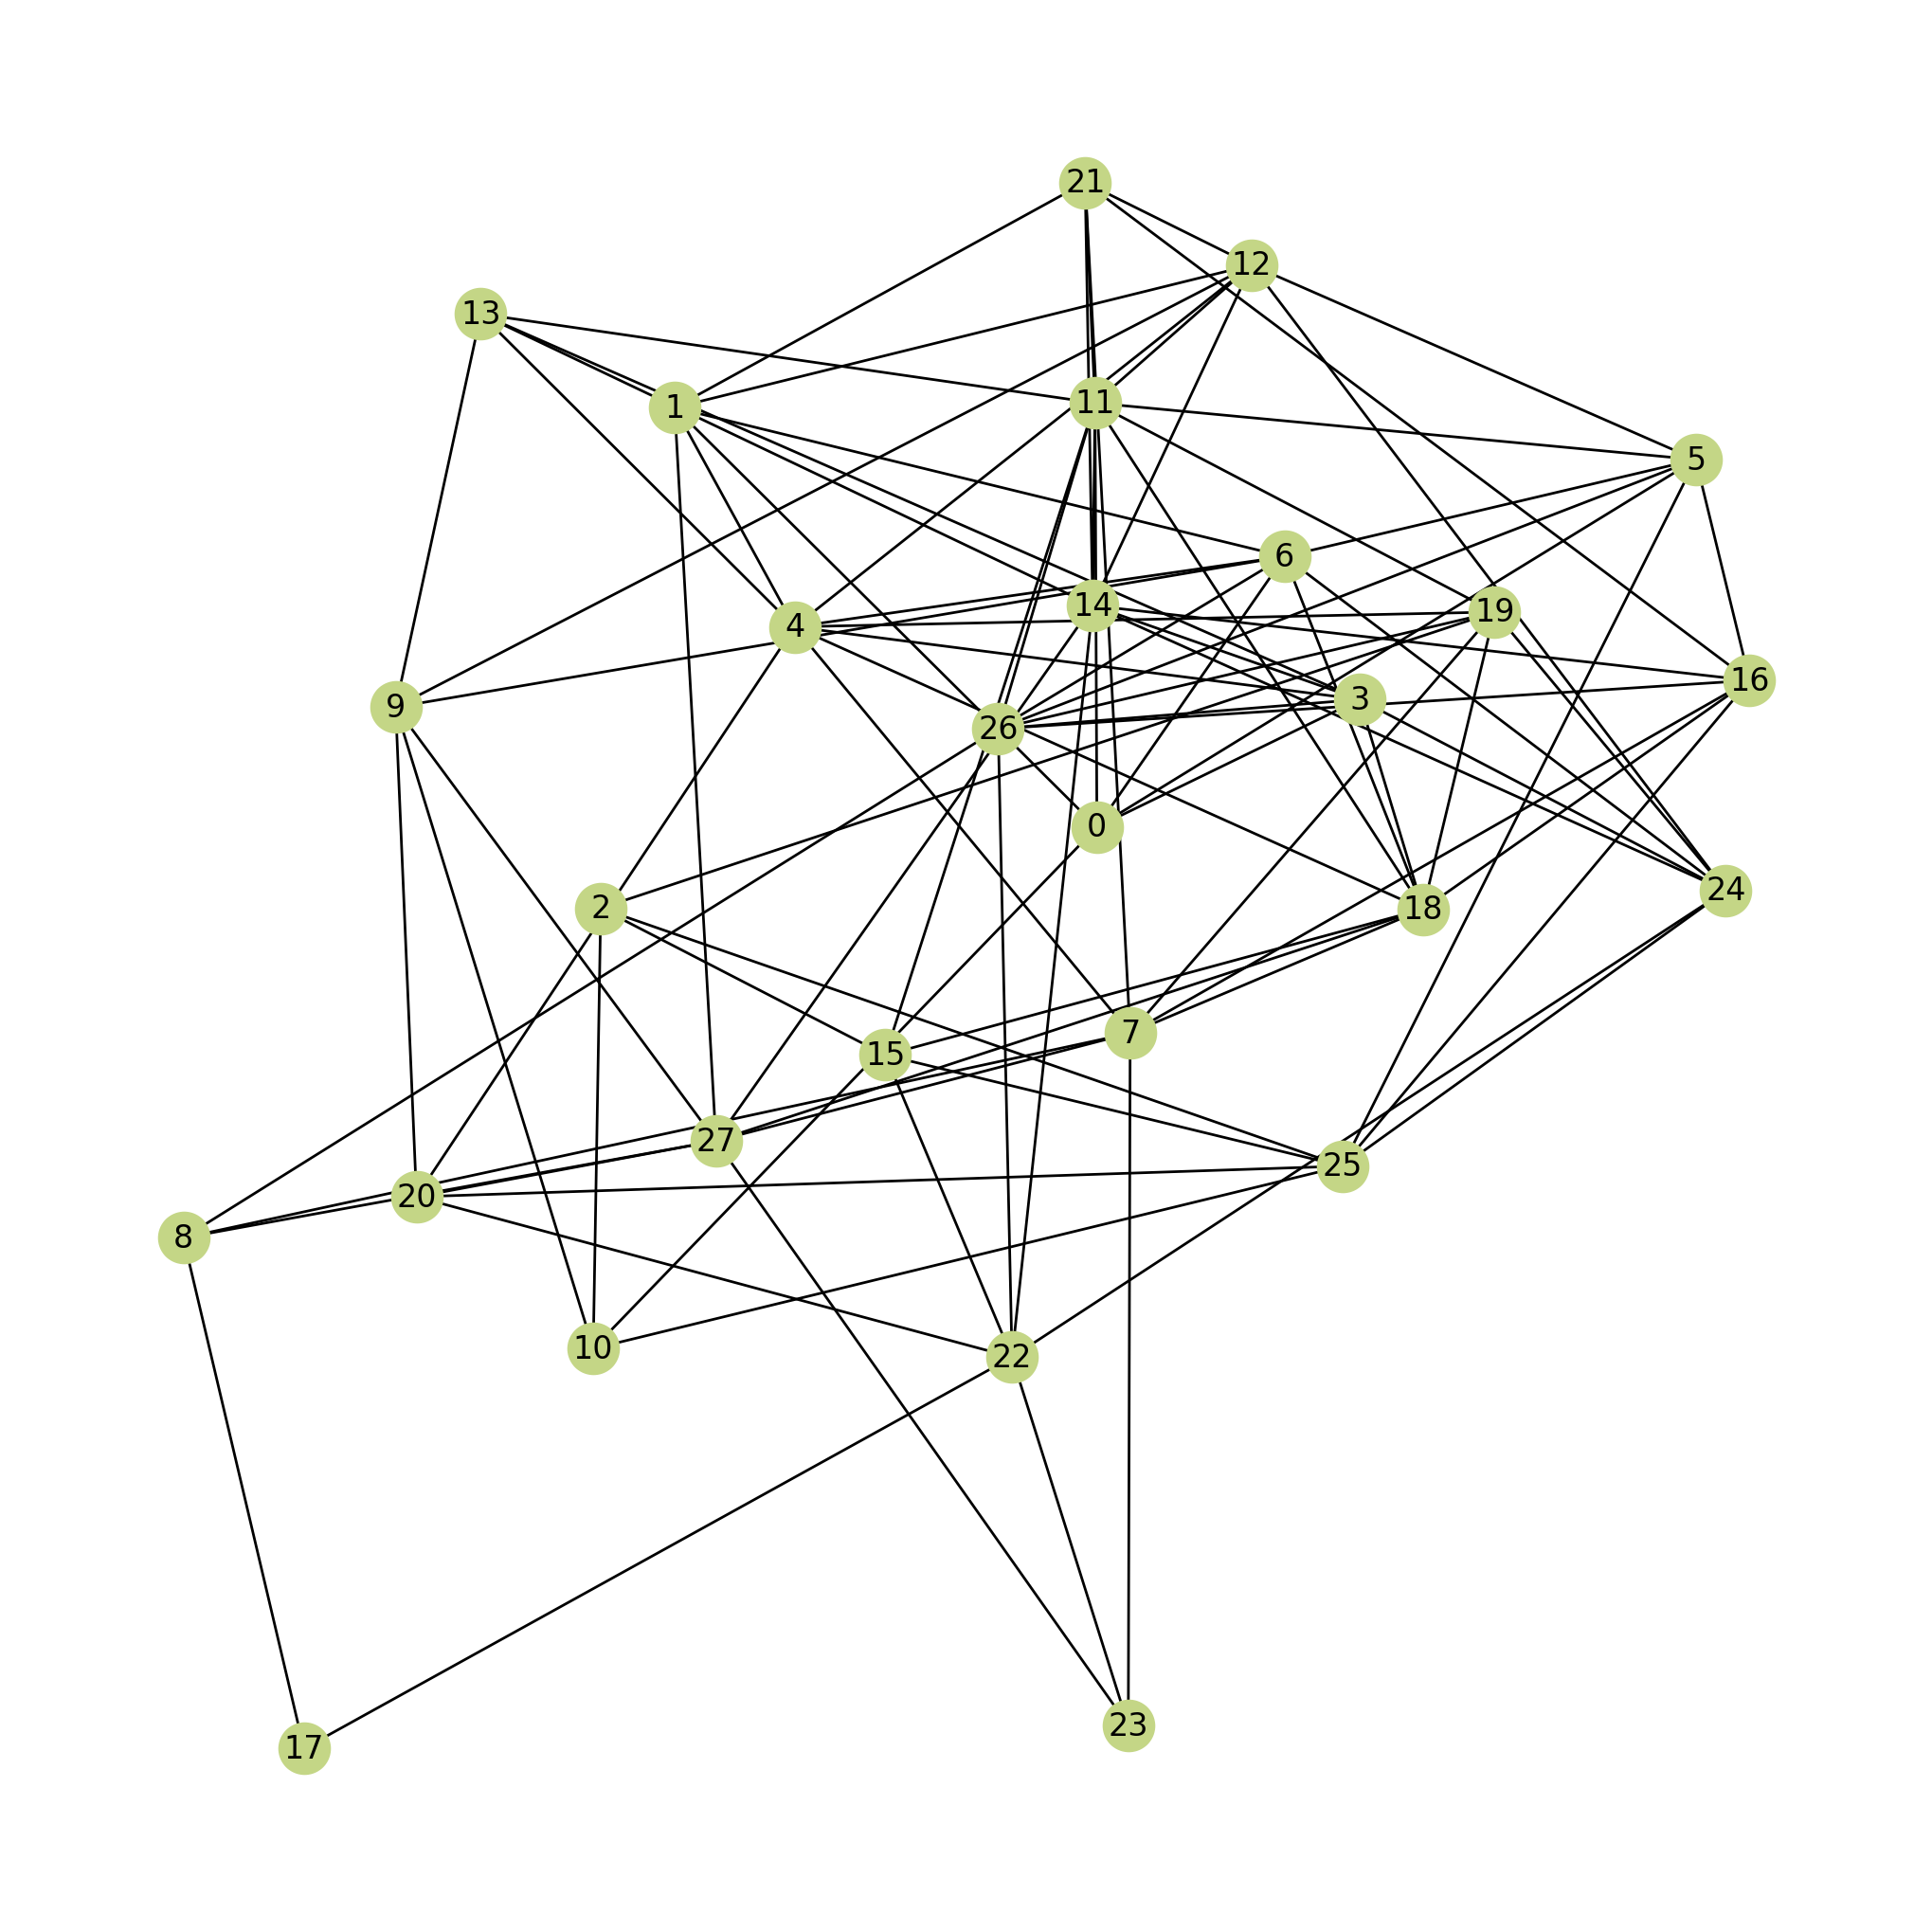

In [38]:
fig = plt.figure(figsize=(10, 10), dpi=200)

# Compute the positions of the nodes
pos = nx.spring_layout(H, k=1)

# Draw the nodes and edges
nx.draw(H, pos, with_labels=True, node_size=100, linewidths=10, node_color="#C4D686")

# Remove axis and adjust margins
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Save the plot to a file
plt.savefig("estuaries__random_graph.png", dpi=300)
plt.show()

In [39]:
H.degree()

DegreeView({0: 6, 1: 6, 2: 4, 3: 7, 4: 9, 5: 7, 6: 8, 7: 8, 8: 4, 9: 6, 10: 4, 11: 10, 12: 8, 13: 5, 14: 9, 15: 5, 16: 7, 17: 2, 18: 9, 19: 7, 20: 5, 21: 6, 22: 7, 23: 3, 24: 7, 25: 7, 26: 8, 27: 8})

In [40]:
print(nx.average_shortest_path_length(H))

1.9312169312169312


In [41]:
print(nx.average_clustering(H))

0.20753968253968255


In [42]:
print(nx.transitivity(H))

0.21195652173913043


In [43]:
print(nx.clustering(H))

{0: 0.2, 1: 0.26666666666666666, 2: 0.3333333333333333, 3: 0.19047619047619047, 4: 0.2222222222222222, 5: 0.3333333333333333, 6: 0.17857142857142858, 7: 0.2857142857142857, 8: 0.16666666666666666, 9: 0.06666666666666667, 10: 0.16666666666666666, 11: 0.2222222222222222, 12: 0.25, 13: 0.3, 14: 0.25, 15: 0.2, 16: 0.23809523809523808, 17: 0, 18: 0.25, 19: 0.23809523809523808, 20: 0.1, 21: 0.4, 22: 0.047619047619047616, 23: 0.3333333333333333, 24: 0.14285714285714285, 25: 0.14285714285714285, 26: 0.14285714285714285, 27: 0.14285714285714285}
